<a href="https://colab.research.google.com/github/Bibek0130/Sentiment-analysis/blob/master/sentiment_analysis_using_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sentiment Analysis
It is also called opinion mining. This is where the text is used to make sentiment of the text. THe sentiment can be positive, negative and neutral.

The flow for sentiment Analysis is :

Datasets --> Cleaning and preprocessing --> Choosing algorithm --> constructing our model pipelines --> Evaluations --> predictions

1. Dataset
2. Data Preprocessing
    removing numbers, punctuation marks, special chars and whitespaces
3. Word Embeddings
    using tfidf to convert our text into numerical format.
4. Train models
    Train your models
5. Predictions
    perform predictions and evaluate how model performs

###Data
The data used for this task will be the Amazon reviews dataset, which consists of reviews from Amazon customers downloaded from Xiang Zhang’s Google Drive dir[1]. The dataset spans 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review. For more information, please refer to the following paper: Hidden Factors and Hidden Topics: Understanding Rating Dimensions with review text [2].

The Amazon reviews dataset is constructed by taking review scores 1 and 2 as negative and 4 and 5 as positive. Samples of score 3 is ignored. In the dataset, class 1 is the negative, and class 2 is the positive. Each class has 1,800,000 training samples and 200,000 testing samples.


In [1]:
#downloading directly from kaggle using opendatasets
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mainalibibek01
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


100%|██████████| 25.7M/25.7M [00:02<00:00, 12.0MB/s]


In [2]:
import pandas as pd
dataset = "/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"
df = pd.read_csv(dataset)
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#see how oour data looks
df.shape

(50000, 2)

In [4]:
#checking for any null values
df.isnull().values.any()
#now we know that we donot have any null values, so we are good to go.

False

<Axes: xlabel='sentiment', ylabel='count'>

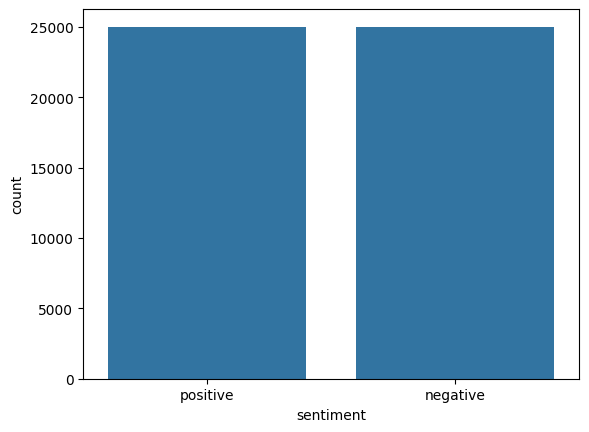

In [5]:
#observing the distriburtion of sentiment in our datasets
import seaborn as sns
sns.countplot(x='sentiment', data=df)
#from the plot we know our data set is uniform.

##Data Preprocessing

To prepare our model for training, we need to do the following data preprocessing techniques:

1. Data cleaning:
    1. remove unwanted characters
    2. Handle missing values
    3. remove duplicates
2. Encode labels
    convert labels into numerical formats.
    categorical elements like postive into 1 and negative into 0.
4. split the dataset
    split the dataset into trainig and test (80, 20)
5. Tokenization
    change words into numerical indices using tokenizer.
    Because we are using sequential model, tokenizer is used. If we use non-sequential modedl lilke Logistic Regression, NB, SVMm etc we use Vectirization to convert the dataset into numerical formats.







#Data cleaning

1. In cleaning the text, we do the following tasks.
  1. Lower casing
  2. removing HTML tags
  3. removing multiple white spaces
  4. convert to lower case
  5. removing punctuation and numbers
  6. removing single characters
  7. removing stopwords


In [6]:
import re
#downloadinfgthe stoip words from nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def clean_text(text):
  #re.sub(pattern, replacement, string)
  text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
  text = text.lower()  # Convert to lowercase
  #removing puctiation and numbers
  text = re.sub('[^a-zA-Z]',' ',text)
  #removing single characters
  text = re.sub(r"\s+[a-zA-Z]\s+",' ',text)
  #remove stopwords
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('',text)
  text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
  return text

df['review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Handle missing values

In [7]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


# Encode labels
positive -> 1
Neagtive -> 0

In [8]:

df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [9]:
print(df['sentiment'].isna())
#verifying that there is no null values in sentiment
print(df['sentiment'].isna().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: sentiment, Length: 50000, dtype: bool
0


In [10]:
from sklearn import preprocessing
Le = preprocessing.LabelEncoder()
df['sentiment'] = Le.fit_transform(df['sentiment'])

In [11]:
df['sentiment'].unique()
df['review'][0]

'one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle cl

In [12]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


# Split the datasets into training and testing
training -> 80%
testing -> 20%

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2, random_state = 42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(40000,)
(10000,)


#Tfidf Vectorization of the text
converts the text into numeri9cal fromat

In [17]:
#convert sparse matrix into a dense array
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000) #tfidf vectorization with reduced features
tf_x_train = tfidf.fit_transform(X_train)
tf_x_test = tfidf.transform(X_test)


In [18]:
print(tf_x_train.shape)

(40000, 5000)


In [19]:
print(tfidf.vocabulary_)
sum = 0
for i in tfidf.vocabulary_.items():
  print(i)
  sum += 1
print(sum)


Streaming output truncated to the last 5000 lines.
('kept', 2418)
('asking', 255)
('many', 2702)
('fights', 1668)
('screaming', 3834)
('matches', 2736)
('general', 1841)
('mayhem', 2749)
('minutes', 2832)
('also', 139)
('stand', 4153)
('think', 4458)
('onedimensional', 3085)
('characters', 702)
('little', 2592)
('depth', 1149)
('virtually', 4763)
('impossible', 2208)
('care', 621)
('happens', 1994)
('badly', 322)
('written', 4974)
('director', 1223)
('hang', 1988)
('beliefs', 389)
('topic', 4528)
('done', 1276)
('much', 2907)
('better', 409)
('dramas', 1299)
('tv', 4621)
('must', 2926)
('confess', 894)
('im', 2190)
('really', 3542)
('one', 3084)
('bad', 321)
('performances', 3206)
('film', 1674)
('said', 3780)
('best', 406)
('friend', 1798)
('nasty', 2944)
('brother', 534)
('absolutely', 8)
('terrible', 4422)
('dont', 1278)
('know', 2453)
('acting', 38)
('school', 3821)
('id', 2171)
('full', 1811)
('post', 3330)
('lead', 2511)
('role', 3724)
('manages', 2694)
('impress', 2209)
('cast',

In [23]:
# from scipy.sparse import csr_matrix

# # Ensure the TF-IDF matrix is in sparse format
# X_train_sparse = csr_matrix(tf_x_train)
# X_test_sparse = csr_matrix(tf_x_test)

# # Skip converting to dense; pad_sequences will be adjusted accordingly if needed.


In [25]:
# print(X_train_sparse)

  (0, 4439)	0.10372902905307804
  (0, 2418)	0.07601084360002257
  (0, 255)	0.09452536445237635
  (0, 2702)	0.12980802510496367
  (0, 1668)	0.09480038989876606
  (0, 3834)	0.09489308746977836
  (0, 2736)	0.11284561224790389
  (0, 1841)	0.07763705316942843
  (0, 2749)	0.11398060652322964
  (0, 2832)	0.055945889595436636
  (0, 139)	0.03958913672048603
  (0, 4153)	0.07818824942495957
  (0, 4458)	0.04218540074812189
  (0, 3085)	0.10928073156642393
  (0, 702)	0.04264557723811014
  (0, 2592)	0.04441797376302386
  (0, 1149)	0.08388716454963513
  (0, 4763)	0.09696989722876141
  (0, 2208)	0.08360230223903994
  (0, 621)	0.06725711902767985
  (0, 1994)	0.07027531880886645
  (0, 322)	0.08003679394495473
  (0, 4974)	0.06572205874066785
  (0, 1223)	0.10416283449977055
  (0, 1988)	0.102775646965564
  :	:
  (39999, 2632)	0.0787721952783736
  (39999, 4635)	0.11900506941907858
  (39999, 3467)	0.10616808003388832
  (39999, 680)	0.14441798872566666
  (39999, 3557)	0.09658163863580625
  (39999, 2230)	0.1227

#prepare data for BiLSTM.
  Since TF-IDF produces sparse vectors, convert them inot sequences and pad them to a fixed length.

In [21]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
# maxlen = 500
# # Convert sparse arrays to dense arrays before padding
# padded_x_train = pad_sequences(X_train_sparse.toarray(), maxlen=maxlen)
# padded_x_test = pad_sequences(X_test_sparse.toarray(), maxlen=maxlen)

In [37]:
# from sklearn.feature_extraction.text import CountVectorizer # or TfidfVectorizer
# from tensorflow.keras.preprocessing.text import Tokenizer
# # Assuming 'vectorizer' is your CountVectorizer/TfidfVectorizer instance
# tf_x_train_text = tfidf.inverse_transform(tf_x_train)

# # Now, use tf_x_train_text in fit_on_texts
# Tokenizer().fit_on_texts(tf_x_train_text)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

#Model building
  we use bilstm model when building

In [38]:
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer for sparse matrix compatibility
model.add(Input(shape=(5000,)))  # Match the `max_features` in TF-IDF

# Add dense layers with LSTM-like architecture
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary
print(model.summary())


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

None


In [52]:
# Train the model
history = model.fit(tf_x_train, y_train, batch_size=32, epochs=5, validation_data=(tf_x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(tf_x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1091s 871ms/step - accuracy: 0.8177 - loss: 0.4029 - val_accuracy: 0.8861 - val_loss: 0.2676
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 327s 252ms/step - accuracy: 0.9092 - loss: 0.2230 - val_accuracy: 0.8839 - val_loss: 0.2709
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 114ms/step - accuracy: 0.9390 - loss: 0.1697 - val_accuracy: 0.8829 - val_loss: 0.2973
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 189s 103ms/step - accuracy: 0.9595 - loss: 0.1217 - val_accuracy: 0.8765 - val_loss: 0.3468
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 94s 65ms/step - accuracy: 0.9726 - loss: 0.0836 - val_accuracy: 0.8798 - val_loss: 0.3931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3832
Test Loss: 0.3931163251399994
Test Accuracy: 0.879800021648407


#predictions

In [56]:
# Generate predictions (probabilities)
y_pred_prob = model.predict(tf_x_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [65]:
input_review = ''' There weas a chacracter named Kamal. He had his father. He made sure he had all the fgacilitied the son needed for him to excel at his studeis.
Kamal was singing when people were worshiuppiung  and praying.
'''
# Preprocess the review
cleaned_review = clean_text(input_review)

# Transform using TF-IDF
transformed_review = tfidf.transform([cleaned_review])
# Predict sentiment
prediction = model.predict(transformed_review)
sentiment = "Positive" if prediction[0] > 0.5 else "Negative"

print(f"Predicted Sentiment: {sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Sentiment: Negative


In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score
#accuracy score of the predicteed values
print(accuracy_score(y_test, y_pred))

#roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.8798
0.8798285687701239
